In [1]:
import numpy as np # fundamental package for scientific computing with Python
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
# from plotly import tools
# import plotly.tools as tls
# import squarify
# from mpl_toolkits.basemap import Basemap
# from numpy import array
# from matplotlib import cm

# import cufflinks and offline mode
import cufflinks as cf
cf.go_offline()
plt.style.use('fivethirtyeight')


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import gc

In [3]:
app_train=pd.read_csv('application_train.csv')
app_test = pd.read_csv('application_test.csv')


In [76]:
# app_train.head() 


In [77]:
# def missing_values_table(df):
#         # Total missing values
#         mis_val = df.isnull().sum()
        
#         # Percentage of missing values
#         mis_val_percent = 100 * df.isnull().sum() / len(df)
        
#         # Make a table with the results
#         mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
#         # Rename the columns
#         mis_val_table_ren_columns = mis_val_table.rename(
#         columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
#         # Sort the table by percentage of missing descending
#         mis_val_table_ren_columns = mis_val_table_ren_columns[
#             mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
#         '% of Total Values', ascending=False).round(1)
        
#         # Print some summary information
#         print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
#             "There are " + str(mis_val_table_ren_columns.shape[0]) +
#               " columns that have missing values.")
        
#         # Return the dataframe with missing information
#         return mis_val_table_ren_columns

In [78]:
# missing_values = missing_values_table(app_train)
# missing_values.head(20)

In [79]:
# (app_train['DAYS_BIRTH'] / -365).describe()


In [80]:
# (app_train['DAYS_EMPLOYED']/-365).describe()


In [81]:
# app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');


In [87]:
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# (app_train['DAYS_EMPLOYED']/-365).plot.hist(title = 'Days Employment Histogram');
# plt.xlabel('Days Employment');

/var/folders/br/l4xf79f56zq0zv81yq294q9r0000gn/T/ipykernel_2370/3155746995.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [82]:

# def plot_stats(feature,label_rotation=False,horizontal_layout=True):
#     temp = app_train[feature].value_counts()
#     df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

#     # Calculate the percentage of target=1 per category value
#     cat_perc = app_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
#     cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
#     if(horizontal_layout):
#         fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
#     else:
#         fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
#     sns.set_color_codes("pastel")
#     s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
#     if(label_rotation):
#         s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
#     s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
#     if(label_rotation):
#         s.set_xticklabels(s.get_xticklabels(),rotation=90)
#     plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
#     plt.tick_params(axis='both', which='major', labelsize=10)

#     plt.show();
    
# def plot_distribution(var):
    
#     i = 0
#     t1 = app_train.loc[app_train['TARGET'] != 0]
#     t0 = app_train.loc[app_train['TARGET'] == 0]

#     sns.set_style('whitegrid')
#     plt.figure()
#     fig, ax = plt.subplots(2,2,figsize=(12,12))

#     for feature in var:
#         i += 1
#         plt.subplot(2,2,i)
#         sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
#         sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
#         plt.ylabel('Density plot', fontsize=12)
#         plt.xlabel(feature, fontsize=12)
#         locs, labels = plt.xticks()
#         plt.tick_params(axis='both', which='major', labelsize=12)
#     plt.show();

In [83]:
# plot_stats('CODE_GENDER')

In [84]:
# plt.figure(figsize = (10, 8))

# # KDE plot of loans that were repaid on time
# sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0')

# # KDE plot of loans which were not repaid on time
# sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1')

# # Labeling of plot
# plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [85]:
# age_data = app_train[['TARGET', 'DAYS_BIRTH']]
# age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365

# # Bin the age data
# age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
# age_groups  = age_data.groupby('YEARS_BINNED').mean()
# plt.figure(figsize = (8, 8))

# # Graph the age bins and the average of the target as a bar plot
# plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# # Plot labeling
# plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
# plt.title('Failure to Repay by Age Group');

In [86]:
# plot_stats('NAME_CONTRACT_TYPE')


In [75]:
# plot_stats('FLAG_OWN_CAR')
# plot_stats('FLAG_OWN_REALTY')

In [74]:
# plot_stats('NAME_FAMILY_STATUS',True, True)


In [73]:
# plot_stats('CNT_CHILDREN')


In [72]:
# plot_stats('NAME_INCOME_TYPE',False,False)


In [70]:
# plot_stats('OCCUPATION_TYPE',True, False)


In [71]:
# plot_stats('NAME_EDUCATION_TYPE',True)


In [22]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']
app_train_domain['INCOME_PER_CHILD'] = app_train_domain['AMT_INCOME_TOTAL'] / app_train_domain['CNT_CHILDREN']
app_train_domain['HAS_HOUSE_INFORMATION'] = app_train_domain['COMMONAREA_MEDI'].apply(lambda x:1 if x>0 else 0)




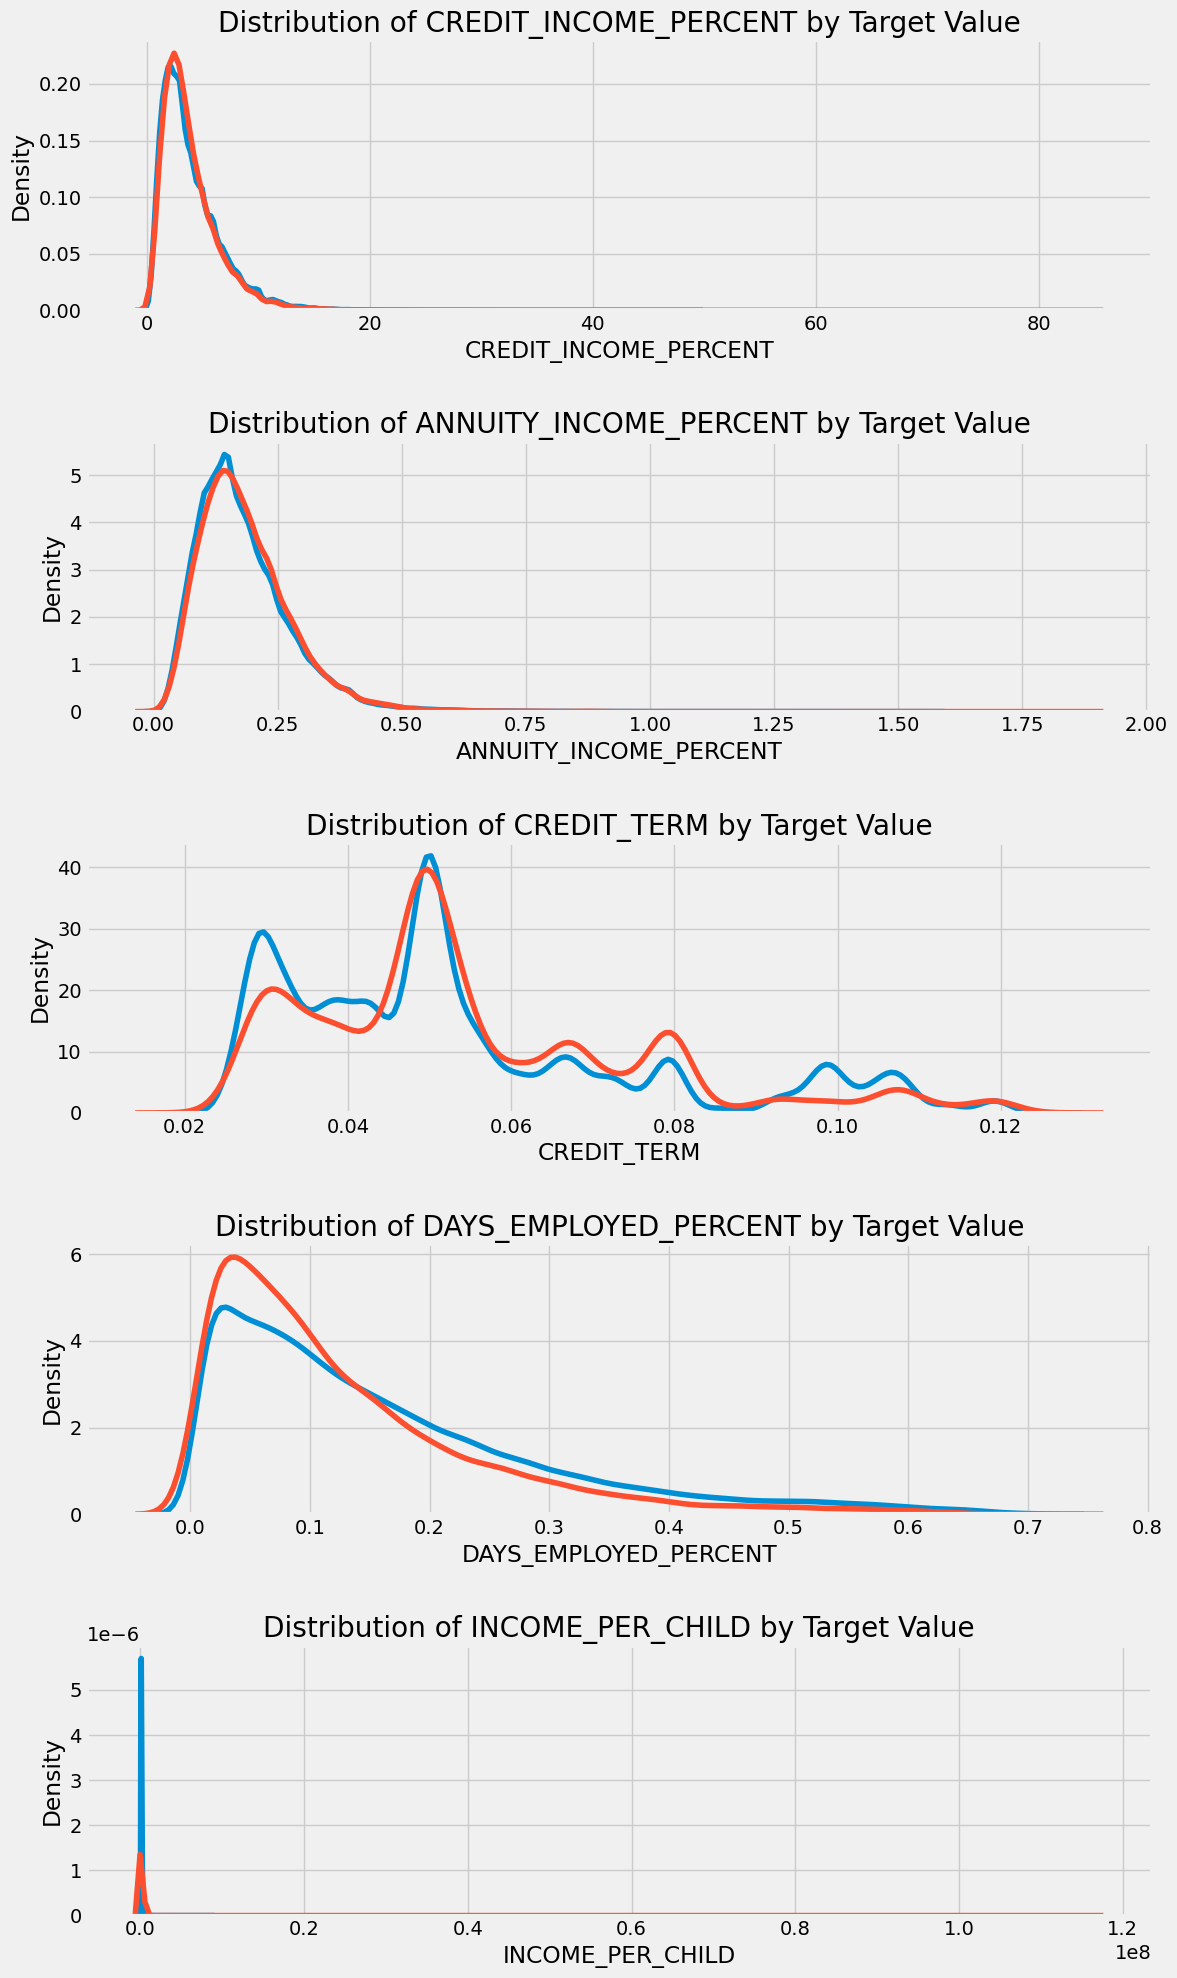

In [23]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT','INCOME_PER_CHILD']):
    
    # create a new subplot for each source
    plt.subplot(5, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [24]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = app_train_domain[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = app_train_domain[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

/var/folders/br/l4xf79f56zq0zv81yq294q9r0000gn/T/ipykernel_2370/1002043548.py:16: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/br/l4xf79f56zq0zv81yq294q9r0000gn/T/ipykernel_2370/1002043548.py:20: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



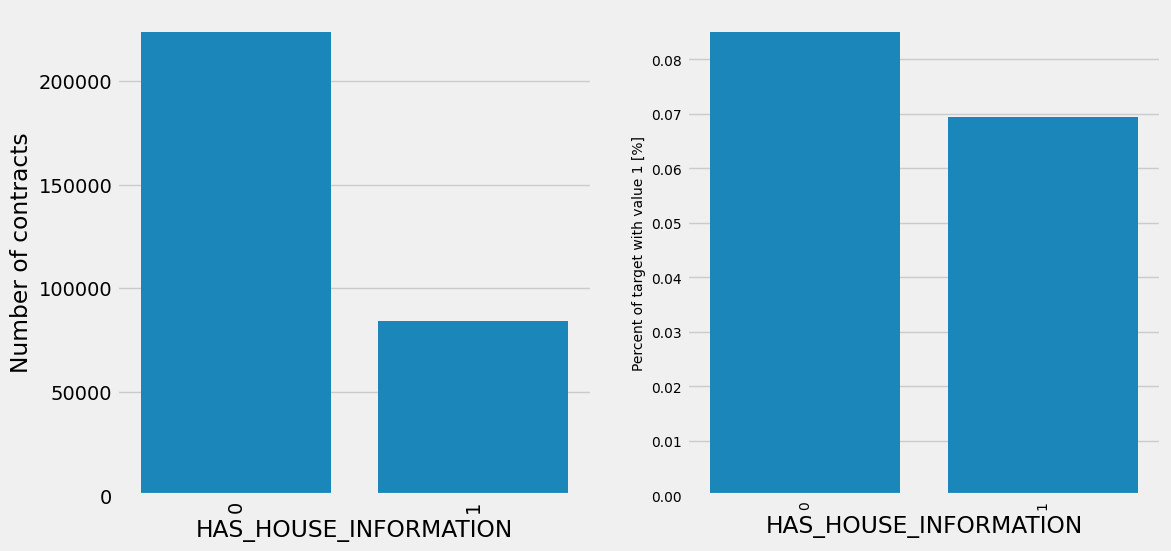

In [25]:
plot_stats('HAS_HOUSE_INFORMATION',True)


In [26]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']
app_test_domain['INCOME_PER_CHILD'] = app_test_domain['AMT_INCOME_TOTAL'] / app_test_domain['CNT_CHILDREN']
app_test_domain['HAS_HOUSE_INFORMATION'] = app_test_domain['COMMONAREA_MEDI'].apply(lambda x:1 if x>0 else 0)

In [27]:
# !pip install lightgbm 


In [28]:
# pip install sklearn

In [29]:
# pip install scikit-learn

In [30]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import gc

In [31]:
def model(app_train_domain, test_features, encoding='ohe'):
    # Replace infinite values with NaN and then handle them
    app_train_domain.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Separating features and target
    X = app_train_domain.drop(columns=['SK_ID_CURR', 'TARGET'])
    y = app_train_domain['TARGET']
    
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Identify categorical and numeric features
    categorical_features = X.select_dtypes(include=['object']).columns
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    
    # Preprocessing Pipeline for categorical features
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    
    # Preprocessing Pipeline for numeric features (imputation and scaling)
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])
    
    # Combine preprocessors
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])
    
    # Apply preprocessing to the data
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)
    
    # Convert the processed data back to DataFrame with appropriate column names
    ohe_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
    feature_names = numeric_features.tolist() + ohe_feature_names.tolist()
    X_train = pd.DataFrame(X_train, columns=feature_names)
    X_val = pd.DataFrame(X_test, columns=feature_names)

    print('Training Data Shape: ', X_train.shape)
    print('Testing Data Shape: ', X_val.shape)

    
    clf_best = TabNetClassifier(n_d = 8,
            n_a = 8,
            n_steps =  7,
            gamma =  1.0,
            lambda_sparse =  0.01)

    # Train the model with early stopping
    clf_best.fit(
        X_train=X_train.values, y_train=y_train.values,
        eval_set=[(X_train.values, y_train.values), (X_val.values, y_test.values)],
        eval_name=['train', 'valid'],
        eval_metric=['accuracy'],
        max_epochs=20,
        patience=5,
        batch_size=1024, 
        virtual_batch_size=128,
        num_workers=0,
        drop_last=False
    )
    
    # Make predictions
    y_pred_train = clf_best.predict(X_train.values)
    y_pred = clf_best.predict(X_val.values)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_pred_train)
    val_accuracy = accuracy_score(y_test, y_pred)
    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Validation Accuracy: {val_accuracy:.4f}')

    # Get feature importances
    feature_importances = pd.DataFrame({
        'feature': feature_names,
        'importance': clf_best.feature_importances_
    }).sort_values(by='importance', ascending=False)
    
    return feature_importances, train_accuracy, val_accuracy


In [32]:
app_train.isnull()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0            False   False               False        False         False   
1            False   False               False        False         False   
2            False   False               False        False         False   
3            False   False               False        False         False   
4            False   False               False        False         False   
...            ...     ...                 ...          ...           ...   
307506       False   False               False        False         False   
307507       False   False               False        False         False   
307508       False   False               False        False         False   
307509       False   False               False        False         False   
307510       False   False               False        False         False   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                 False         False             False       False   
1                 False         False             False       False   
2                 False         False             False       False   
3                 False         False             False       False   
4                 False         False             False       False   
...                 ...           ...               ...         ...   
307506            False         False             False       False   
307507            False         False             False       False   
307508            False         False             False       False   
307509            False         False             False       False   
307510            False         False             False       False   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0             False  ...             False             False   
1             False  ...             False             False   
2             False  ...             False             False   
3             False  ...             False             False   
4             False  ...             False             False   
...             ...  ...               ...               ...   
307506        False  ...             False             False   
307507        False  ...             False             False   
307508        False  ...             False             False   
307509        False  ...             False             False   
307510        False  ...             False             False   

        FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                  False             False                       False   
1                  False             False                       False   
2                  False             False                       False   
3                  False             False                        True   
4                  False             False                       False   
...                  ...               ...                         ...   
307506             False             False                        True   
307507             False             False                        True   
307508             False             False                       False   
307509             False             False                       False   
307510             False             False                       False   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                           False                       False   
1                           False                       False   
2                           False                       False   
3                            True                        True   
4                           False                       False   
...                           ...                         ...   
307506                       True                        True   
307507                       True                   

In [33]:
# Count the number of missing values in each column
missing_values = app_train.isnull().sum()

# Print the number of missing values for each column
print(missing_values)

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


In [34]:
def objective_random_search(X_train, y_train, n_iter=80):
    # Define the hyperparameter grid
    param_distributions = [
        {'logreg__C': [0.01, 0.1, 1, 10], 'logreg__penalty': ['l1'], 'logreg__solver': ['liblinear'], 'logreg__max_iter': [10000], 'logreg__class_weight': [None, 'balanced']},
        {'logreg__C': [0.01, 0.1, 1, 10], 'logreg__penalty': ['l2'], 'logreg__solver': ['liblinear', 'lbfgs', 'saga'], 'logreg__max_iter': [10000], 'logreg__class_weight': [None, 'balanced']}
    ]
    
    # Create the logistic regression pipeline with scaling
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize features
        ('logreg', LogisticRegression(random_state=50))  # Logistic Regression model
    ])
    
    # Initialize the RandomizedSearchCV object with cross-validation
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_distributions,
        scoring='roc_auc',
        n_iter=n_iter,  # Number of parameter settings sampled
        cv=3,  # Use 3-fold cross-validation
        verbose=1,
        random_state=50,
        n_jobs=-1  # Use all available cores
    )
    
    # Fit the RandomizedSearchCV object
    random_search.fit(X_train, y_train)
    
    # Get the best score on the validation set
    best_score = random_search.best_score_
    
    # Get the best parameters
    best_params = random_search.best_params_
    
    return best_score, best_params


In [35]:
def model(features, test_features, encoding='ohe', test_size=0.2, random_state=42, frac=1.0):
    # Sample a fraction of the data
    if frac < 1.0:
        features = features.sample(frac=frac, random_state=random_state)
        test_features = test_features.sample(frac=frac, random_state=random_state)
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns=['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns=['SK_ID_CURR'])
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join='inner', axis=1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)

    # Check for infinite values in features
    print("Checking for infinite values in training features...")
    if np.any(np.isinf(features)):
        print("Infinite values found in training features. Replacing with NaNs...")
        features = np.where(np.isfinite(features), features, np.nan)
        
    # Check for infinite values in test features
    print("Checking for infinite values in test features...")
    if np.any(np.isinf(test_features)):
        print("Infinite values found in test features. Replacing with NaNs...")
        test_features = np.where(np.isfinite(test_features), test_features, np.nan)
    
    # Handle missing values with SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    features = imputer.fit_transform(features)
    test_features = imputer.transform(test_features)

    # Clip values to a reasonable range (e.g., -1e10 to 1e10)
    features = np.clip(features, -1e10, 1e10)
    test_features = np.clip(test_features, -1e10, 1e10)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=test_size, random_state=random_state)
    
    # Run random search from the previously defined function
    best_auc, best_params = objective_random_search(X_train, y_train)
    print(f'Best parameters found: {best_params}')
    print(f'Best cross-validation AUC: {best_auc}')
    
    # Extract parameters for logistic regression
    logreg_params = {key.replace('logreg__', ''): value for key, value in best_params.items() if key.startswith('logreg__')}

    # Create the logistic regression model with scaling using the best found parameters
    if logreg_params['solver'] == 'liblinear':
        logreg_params.pop('n_jobs', None)
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize features
        ('logreg', LogisticRegression(**logreg_params, random_state=50))  # Logistic Regression model
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = pipeline.predict_proba(X_train)[:, 1]
    y_pred_val = pipeline.predict_proba(X_val)[:, 1]
    test_predictions = pipeline.predict_proba(test_features)[:, 1]
    
    # Calculate AUC
    train_auc = roc_auc_score(y_train, y_pred_train)
    val_auc = roc_auc_score(y_val, y_pred_val)
    print(f'Train AUC: {train_auc:.4f}')
    print(f'Validation AUC: {val_auc:.4f}')
    
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Clean up memory
    gc.enable()
    del pipeline
    gc.collect()
    
    return submission, train_auc, val_auc

In [36]:
submission, train_auc, val_auc = model(app_train_domain, app_test_domain, frac=0.01)
print('Baseline metrics')
print(f'Train AUC: {train_auc}, Validation AUC: {val_auc}')

del app_train_domain, app_test_domain
gc.collect()


Training Data Shape:  (3075, 229)
Testing Data Shape:  (487, 229)
Checking for infinite values in training features...
Infinite values found in training features. Replacing with NaNs...
Checking for infinite values in test features...
Infinite values found in test features. Replacing with NaNs...
Fitting 3 folds for each of 32 candidates, totalling 96 fits


/Users/allenyu/anaconda3/envs/AMLProject/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 32 is smaller than n_iter=80. Running 32 iterations. For exhaustive searches, use GridSearchCV.



Best parameters found: {'logreg__solver': 'liblinear', 'logreg__penalty': 'l1', 'logreg__max_iter': 10000, 'logreg__class_weight': None, 'logreg__C': 0.1}
Best cross-validation AUC: 0.7014307531548911
Train AUC: 0.8065
Validation AUC: 0.7390
Baseline metrics
Train AUC: 0.8065268065268065, Validation AUC: 0.7390020422807309


19291

In [37]:
bureau = pd.read_csv('bureau.csv')
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [38]:
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})
previous_loan_counts.head()

SK_ID_CURR  previous_loan_counts
0      100001                     7
1      100002                     8
2      100003                     4
3      100004                     2
4      100005                     3

In [39]:
app_train = app_train.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')

# Fill the missing values with 0 
app_train['previous_loan_counts'] = app_train['previous_loan_counts'].fillna(0)
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0   
1  ...                 0                0                0   
2  ...                 0                0                0   
3  ...                 0                0                0   
4  ...                 0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  previous_loan_counts  
0                        0.0                         1.0                   8.0  
1                        0.0                         0.0                   4.0  
2                        0.0                         0.0                   2.0  
3                        NaN                         NaN                   0.0  
4                        0.0                         0.0                   1.0  

[5 rows x 123 columns]

In [40]:
print(app_train[app_train.TARGET==1]['previous_loan_counts'].describe())
print(app_train[app_train.TARGET==0]['previous_loan_counts'].describe())

count    24825.000000
mean         4.613092
std          4.732792
min          0.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         55.000000
Name: previous_loan_counts, dtype: float64
count    282686.000000
mean          4.778464
std           4.474586
min           0.000000
25%           1.000000
50%           4.000000
75%           7.000000
max         116.000000
Name: previous_loan_counts, dtype: float64


In [41]:
def kde_target(var_name, df):
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = df['TARGET'].corr(df[var_name])
    
    # Calculate medians for repaid vs not repaid
    avg_repaid = df.loc[df['TARGET'] == 0, var_name].median()
    avg_not_repaid = df.loc[df['TARGET'] == 1, var_name].median()
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df.loc[df['TARGET'] == 0, var_name], label = 'TARGET == 0')
    sns.kdeplot(df.loc[df['TARGET'] == 1, var_name], label = 'TARGET == 1')
    
    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    plt.legend();
    
    # print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))
    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid =     %0.4f' % avg_repaid)
    

The correlation between previous_loan_counts and the TARGET is -0.0100
Median value for loan that was not repaid = 3.0000
Median value for loan that was repaid =     4.0000


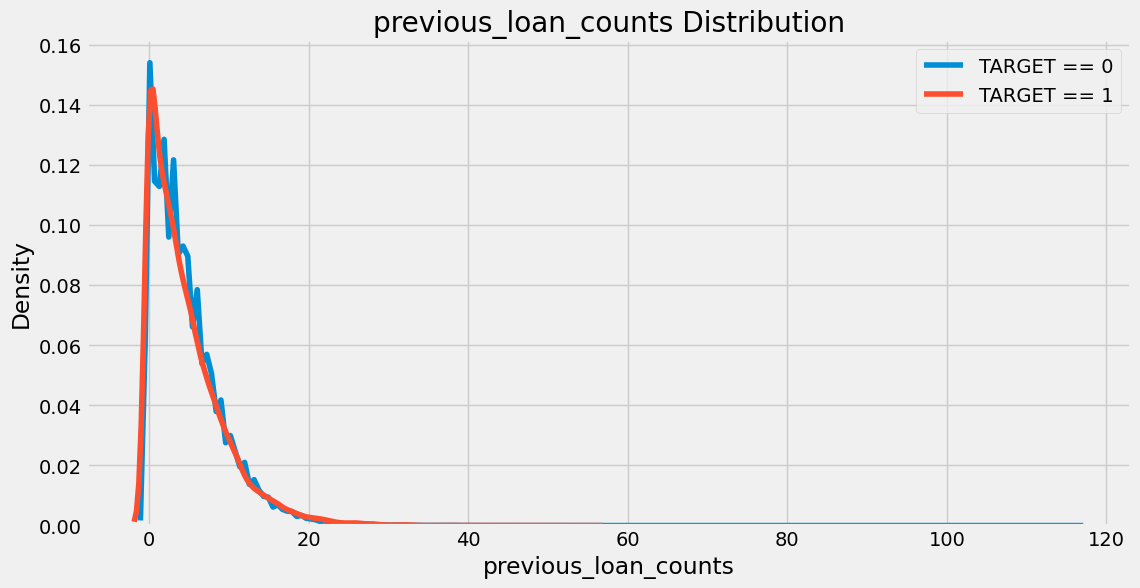

In [42]:

kde_target('previous_loan_counts', app_train)


In [43]:
app_train

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                             0.0                       0.0   
1                             0.0                       0.0   
2                             0.0                       0.0   
3                             NaN                       NaN   
4                             0.0                       0.0   
...                           ...                       ...   
307506                        NaN                       NaN   
307507                        NaN                       NaN   
307508                        1.0                       0.0   
307509                        0.0                       0.0   
307510                        0.0                       0.0   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             NaN                        NaN   
4                             0.0                        0.0   
...                           ...                        ...   
307506                        NaN                        NaN   
307507                        NaN               

In [44]:
print(bureau.dtypes)


SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
dtype: object


In [45]:
bureau_agg = bureau.drop(columns = ['SK_ID_BUREAU','CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']).groupby('SK_ID_CURR', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum'])
bureau_agg.head()

SK_ID_CURR DAYS_CREDIT                               CREDIT_DAY_OVERDUE  \
                   count         mean  max   min   sum              count   
0     100001           7  -735.000000  -49 -1572 -5145                  7   
1     100002           8  -874.000000 -103 -1437 -6992                  8   
2     100003           4 -1400.750000 -606 -2586 -5603                  4   
3     100004           2  -867.000000 -408 -1326 -1734                  2   
4     100005           3  -190.666667  -62  -373  -572                  3   

                ... DAYS_CREDIT_UPDATE                               \
  mean max min  ...              count        mean  max   min   sum   
0  0.0   0   0  ...                  7  -93.142857   -6  -155  -652   
1  0.0   0   0  ...                  8 -499.875000   -7 -1185 -3999   
2  0.0   0   0  ...                  4 -816.000000  -43 -2131 -3264   
3  0.0   0   0  ...                  2 -532.000000 -382  -682 -1064   
4  0.0   0   0  ...                  3  -54.333333  -11  -121  -163   

  AMT_ANNUITY                                      
        count         mean      max  min      sum  
0           7  3545.357143  10822.5  0.0  24817.5  
1           7     0.000000      0.0  0.0      0.0  
2           0          NaN      NaN  NaN      0.0  
3           0          NaN      NaN  NaN      0.0  
4           3  1420.500000   4261.5  0.0   4261.5  

[5 rows x 61 columns]

In [46]:
columns = ['SK_ID_CURR']

# Iterate through the variables names
for var in bureau_agg.columns.levels[0]:
    # Skip the id name
    if var != 'SK_ID_CURR':
        
        # Iterate through the stat names
        for stat in bureau_agg.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            columns.append('bureau_%s_%s' % (var, stat))

In [47]:
bureau_agg.columns = columns
bureau_agg.head()

SK_ID_CURR  bureau_DAYS_CREDIT_count  bureau_DAYS_CREDIT_mean  \
0      100001                         7              -735.000000   
1      100002                         8              -874.000000   
2      100003                         4             -1400.750000   
3      100004                         2              -867.000000   
4      100005                         3              -190.666667   

   bureau_DAYS_CREDIT_max  bureau_DAYS_CREDIT_min  bureau_DAYS_CREDIT_sum  \
0                     -49                   -1572                   -5145   
1                    -103                   -1437                   -6992   
2                    -606                   -2586                   -5603   
3                    -408                   -1326                   -1734   
4                     -62                    -373                    -572   

   bureau_CREDIT_DAY_OVERDUE_count  bureau_CREDIT_DAY_OVERDUE_mean  \
0                                7                             0.0   
1                                8                             0.0   
2                                4                             0.0   
3                                2                             0.0   
4                                3                             0.0   

   bureau_CREDIT_DAY_OVERDUE_max  bureau_CREDIT_DAY_OVERDUE_min  ...  \
0                              0                              0  ...   
1                              0                              0  ...   
2                              0                              0  ...   
3                              0                              0  ...   
4                              0                              0  ...   

   bureau_DAYS_CREDIT_UPDATE_count  bureau_DAYS_CREDIT_UPDATE_mean  \
0                                7                      -93.142857   
1                                8                     -499.875000   
2                                4                     -816.000000   
3                                2                     -532.000000   
4                                3                      -54.333333   

   bureau_DAYS_CREDIT_UPDATE_max  bureau_DAYS_CREDIT_UPDATE_min  \
0                             -6                           -155   
1                             -7                          -1185   
2                            -43                          -2131   
3                           -382                           -682   
4                            -11                           -121   

   bureau_DAYS_CREDIT_UPDATE_sum  bureau_AMT_ANNUITY_count  \
0                           -652                         7   
1                          -3999                         7   
2                          -3264                         0   
3                          -1064                         0   
4                           -163                         3   

   bureau_AMT_ANNUITY_mean  bureau_AMT_ANNUITY_max  bureau_AMT_ANNUITY_min  \
0              3545.357143                 10822.5                     0.0   
1                 0.000000                     0.0                     0.0   
2                      NaN                     NaN                     NaN   
3                      NaN                     NaN                     NaN   
4              1420.500000                  4261.5                     0.0   

   bureau_AMT_ANNUITY_sum  
0                 24817.5  
1                     0.0  
2                     0.0  
3                     0.0  
4                  4261.5  

[5 rows x 61 columns]

In [48]:
app_train = app_train.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  bureau_DAYS_CREDIT_UPDATE_count bureau_DAYS_CREDIT_UPDATE_mean  \
0  ...                              8.0                       -499.875   
1  ...                              4.0                       -816.000   
2  ...                              2.0                       -532.000   
3  ...                              NaN                            NaN   
4  ...                              1.0                       -783.000   

  bureau_DAYS_CREDIT_UPDATE_max bureau_DAYS_CREDIT_UPDATE_min  \
0                          -7.0                       -1185.0   
1                         -43.0                       -2131.0   
2                        -382.0                        -682.0   
3                           NaN                           NaN   
4                        -783.0                        -783.0   

  bureau_DAYS_CREDIT_UPDATE_sum bureau_AMT_ANNUITY_count  \
0                       -3999.0                      7.0   
1                       -3264.0                      0.0   
2                       -1064.0                      0.0   
3                           NaN                      NaN   
4                        -783.0                      0.0   

   bureau_AMT_ANNUITY_mean  bureau_AMT_ANNUITY_max  bureau_AMT_ANNUITY_min  \
0                      0.0                     0.0                     0.0   
1                      NaN                     NaN                     NaN   
2                      NaN                     NaN                     NaN   
3                      NaN                     NaN                     NaN   
4                      NaN                     NaN                     NaN   

   bureau_AMT_ANNUITY_sum  
0                     0.0  
1                     0.0  
2                     0.0  
3                     NaN  
4                     0.0  

[5 rows x 183 columns]

In [49]:
# List of new correlations
new_corrs = []

# Iterate through the columns 
for col in columns:
    # Calculate correlation with the target
    corr = app_train['TARGET'].corr(app_train[col])
    
    # Append the list as a tuple

    new_corrs.append((col, corr))

In [50]:
new_corrs = sorted(new_corrs, key = lambda x: abs(x[1]), reverse = True)
new_corrs[:15]

[('bureau_DAYS_CREDIT_mean', 0.08972896721998114),
 ('bureau_DAYS_CREDIT_min', 0.0752482510301036),
 ('bureau_DAYS_CREDIT_UPDATE_mean', 0.06892735266968673),
 ('bureau_DAYS_ENDDATE_FACT_min', 0.05588737984392077),
 ('bureau_DAYS_CREDIT_ENDDATE_sum', 0.0537348956010205),
 ('bureau_DAYS_ENDDATE_FACT_mean', 0.05319962585758616),
 ('bureau_DAYS_CREDIT_max', 0.04978205463997299),
 ('bureau_DAYS_ENDDATE_FACT_sum', 0.048853502611115894),
 ('bureau_DAYS_CREDIT_ENDDATE_mean', 0.046982754334835494),
 ('bureau_DAYS_CREDIT_UPDATE_min', 0.042863922470730155),
 ('bureau_DAYS_CREDIT_sum', 0.041999824814846716),
 ('bureau_DAYS_CREDIT_UPDATE_sum', 0.04140363535306002),
 ('bureau_DAYS_CREDIT_ENDDATE_max', 0.036589634696329094),
 ('bureau_DAYS_CREDIT_ENDDATE_min', 0.034281109921616024),
 ('bureau_DAYS_ENDDATE_FACT_count', -0.030492306653325495)]

The correlation between bureau_DAYS_CREDIT_mean and the TARGET is 0.0897
Median value for loan that was not repaid = -835.3333
Median value for loan that was repaid =     -1067.0000


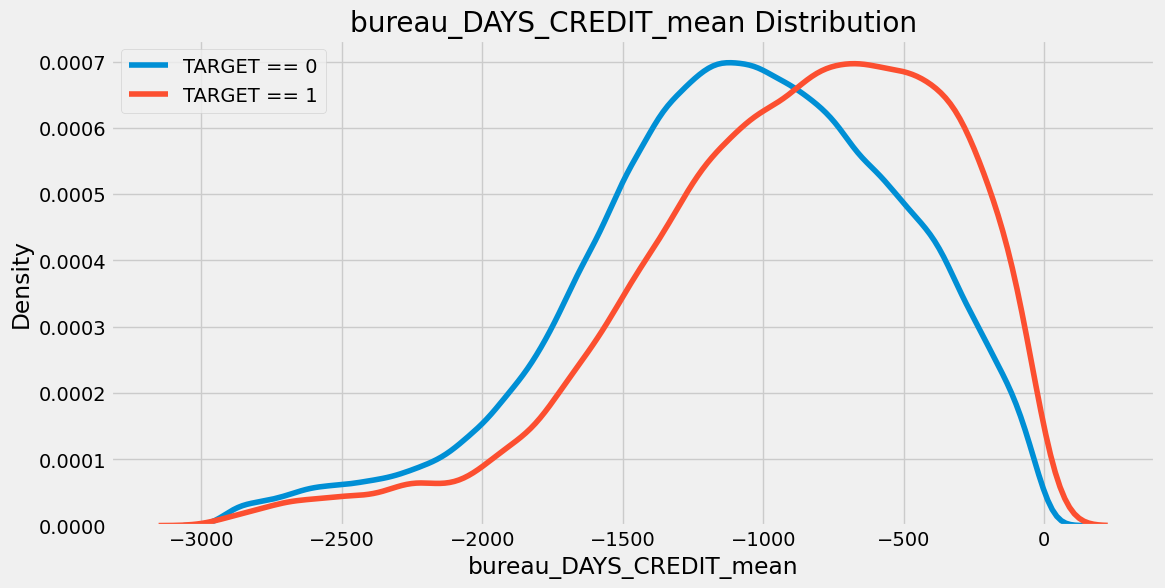

In [51]:
kde_target('bureau_DAYS_CREDIT_mean', app_train)

In [52]:
def agg_numeric(df, group_var, df_name):
    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

In [53]:

bureau_agg_new = agg_numeric(bureau.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_agg_new.head()

SK_ID_CURR  bureau_DAYS_CREDIT_count  bureau_DAYS_CREDIT_mean  \
0      100001                         7              -735.000000   
1      100002                         8              -874.000000   
2      100003                         4             -1400.750000   
3      100004                         2              -867.000000   
4      100005                         3              -190.666667   

   bureau_DAYS_CREDIT_max  bureau_DAYS_CREDIT_min  bureau_DAYS_CREDIT_sum  \
0                     -49                   -1572                   -5145   
1                    -103                   -1437                   -6992   
2                    -606                   -2586                   -5603   
3                    -408                   -1326                   -1734   
4                     -62                    -373                    -572   

   bureau_CREDIT_DAY_OVERDUE_count  bureau_CREDIT_DAY_OVERDUE_mean  \
0                                7                             0.0   
1                                8                             0.0   
2                                4                             0.0   
3                                2                             0.0   
4                                3                             0.0   

   bureau_CREDIT_DAY_OVERDUE_max  bureau_CREDIT_DAY_OVERDUE_min  ...  \
0                              0                              0  ...   
1                              0                              0  ...   
2                              0                              0  ...   
3                              0                              0  ...   
4                              0                              0  ...   

   bureau_DAYS_CREDIT_UPDATE_count  bureau_DAYS_CREDIT_UPDATE_mean  \
0                                7                      -93.142857   
1                                8                     -499.875000   
2                                4                     -816.000000   
3                                2                     -532.000000   
4                                3                      -54.333333   

   bureau_DAYS_CREDIT_UPDATE_max  bureau_DAYS_CREDIT_UPDATE_min  \
0                             -6                           -155   
1                             -7                          -1185   
2                            -43                          -2131   
3                           -382                           -682   
4                            -11                           -121   

   bureau_DAYS_CREDIT_UPDATE_sum  bureau_AMT_ANNUITY_count  \
0                           -652                         7   
1                          -3999                         7   
2                          -3264                         0   
3                          -1064                         0   
4                           -163                         3   

   bureau_AMT_ANNUITY_mean  bureau_AMT_ANNUITY_max  bureau_AMT_ANNUITY_min  \
0              3545.357143                 10822.5                     0.0   
1                 0.000000                     0.0                     0.0   
2                      NaN                     NaN                     NaN   
3                      NaN                     NaN                     NaN   
4              1420.500000                  4261.5                     0.0   

   bureau_AMT_ANNUITY_sum  
0                 24817.5  
1                     0.0  
2                     0.0  
3                     0.0  
4                  4261.5  

[5 rows x 61 columns]

In [54]:

def target_corrs(df):

    # List of correlations
    corrs = []

    # Iterate through the columns 
    for col in df.columns:
        print(col)
        # Skip the target column
        if col != 'TARGET':
            # Calculate correlation with the target
            corr = df['TARGET'].corr(df[col])

            # Append the list as a tuple
            corrs.append((col, corr))
            
    # Sort by absolute magnitude of correlations
    corrs = sorted(corrs, key = lambda x: abs(x[1]), reverse = True)
    
    return corrs

In [55]:
categorical = pd.get_dummies(bureau.select_dtypes('object'))
categorical['SK_ID_CURR'] = bureau['SK_ID_CURR']
categorical.head()

CREDIT_ACTIVE_Active  CREDIT_ACTIVE_Bad debt  CREDIT_ACTIVE_Closed  \
0                 False                   False                  True   
1                  True                   False                 False   
2                  True                   False                 False   
3                  True                   False                 False   
4                  True                   False                 False   

   CREDIT_ACTIVE_Sold  CREDIT_CURRENCY_currency 1  CREDIT_CURRENCY_currency 2  \
0               False                        True                       False   
1               False                        True                       False   
2               False                        True                       False   
3               False                        True                       False   
4               False                        True                       False   

   CREDIT_CURRENCY_currency 3  CREDIT_CURRENCY_currency 4  \
0                       False                       False   
1                       False                       False   
2                       False                       False   
3                       False                       False   
4                       False                       False   

   CREDIT_TYPE_Another type of loan  CREDIT_TYPE_Car loan  ...  \
0                             False                 False  ...   
1                             False                 False  ...   
2                             False                 False  ...   
3                             False                 False  ...   
4                             False                 False  ...   

   CREDIT_TYPE_Loan for business development  \
0                                      False   
1                                      False   
2                                      False   
3                                      False   
4                                      False   

   CREDIT_TYPE_Loan for purchase of shares (margin lending)  \
0                                              False          
1                                              False          
2                                              False          
3                                              False          
4                                              False          

   CREDIT_TYPE_Loan for the purchase of equipment  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   CREDIT_TYPE_Loan for working capital replenishment  CREDIT_TYPE_Microloan  \
0                                              False                   False   
1                                              False                   False   
2                                              False                   False   
3                                              False                   False   
4                                              False                   False   

   CREDIT_TYPE_Mobile operator loan  CREDIT_TYPE_Mortgage  \
0                             False                 False   
1                             False                 False   
2                             False                 False   
3                             False                 False   
4                             False                 False   

   CREDIT_TYPE_Real estate loan  CREDIT_TYPE_Unknown type of loan  SK_ID_CURR  
0                         False                             False      215354  
1                         False                             False      215354  
2                         False                             False      215354  
3                         False                             False      215354  
4                         False                             False      215354 

In [56]:
categorical_grouped = categorical.groupby('SK_ID_CURR').agg(['sum', 'mean'])
categorical_grouped.head()

CREDIT_ACTIVE_Active           CREDIT_ACTIVE_Bad debt       \
                            sum      mean                    sum mean   
SK_ID_CURR                                                              
100001                        3  0.428571                      0  0.0   
100002                        2  0.250000                      0  0.0   
100003                        1  0.250000                      0  0.0   
100004                        0  0.000000                      0  0.0   
100005                        2  0.666667                      0  0.0   

           CREDIT_ACTIVE_Closed           CREDIT_ACTIVE_Sold       \
                            sum      mean                sum mean   
SK_ID_CURR                                                          
100001                        4  0.571429                  0  0.0   
100002                        6  0.750000                  0  0.0   
100003                        3  0.750000                  0  0.0   
100004                        2  1.000000                  0  0.0   
100005                        1  0.333333                  0  0.0   

           CREDIT_CURRENCY_currency 1       ... CREDIT_TYPE_Microloan       \
                                  sum mean  ...                   sum mean   
SK_ID_CURR                                  ...                              
100001                              7  1.0  ...                     0  0.0   
100002                              8  1.0  ...                     0  0.0   
100003                              4  1.0  ...                     0  0.0   
100004                              2  1.0  ...                     0  0.0   
100005                              3  1.0  ...                     0  0.0   

           CREDIT_TYPE_Mobile operator loan      CREDIT_TYPE_Mortgage       \
                                        sum mean                  sum mean   
SK_ID_CURR                                                                   
100001                                    0  0.0                    0  0.0   
100002                                    0  0.0                    0  0.0   
100003                                    0  0.0                    0  0.0   
100004                                    0  0.0                    0  0.0   
100005                                    0  0.0                    0  0.0   

           CREDIT_TYPE_Real estate loan      CREDIT_TYPE_Unknown type of loan  \
                                    sum mean                              sum   
SK_ID_CURR                                                                      
100001                                0  0.0                                0   
100002                                0  0.0                                0   
100003                                0  0.0                                0   
100004                                0  0.0                                0   
100005                                0  0.0                                0   

                 
           mean  
SK_ID_CURR       
100001      0.0  
100002      0.0  
100003      0.0  
100004      0.0  
100005      0.0  

[5 rows x 46 columns]

In [57]:
group_var = 'SK_ID_CURR'

# Need to create new column names
columns = []

# Iterate through the variables names
for var in categorical_grouped.columns.levels[0]:
    # Skip the grouping variable
    if var != group_var:
        # Iterate through the stat names
        for stat in ['count', 'count_norm']:
            # Make a new column name for the variable and stat
            columns.append('%s_%s' % (var, stat))

#  Rename the columns
categorical_grouped.columns = columns

categorical_grouped.head()

CREDIT_ACTIVE_Active_count  CREDIT_ACTIVE_Active_count_norm  \
SK_ID_CURR                                                                
100001                               3                         0.428571   
100002                               2                         0.250000   
100003                               1                         0.250000   
100004                               0                         0.000000   
100005                               2                         0.666667   

            CREDIT_ACTIVE_Bad debt_count  CREDIT_ACTIVE_Bad debt_count_norm  \
SK_ID_CURR                                                                    
100001                                 0                                0.0   
100002                                 0                                0.0   
100003                                 0                                0.0   
100004                                 0                                0.0   
100005                                 0                                0.0   

            CREDIT_ACTIVE_Closed_count  CREDIT_ACTIVE_Closed_count_norm  \
SK_ID_CURR                                                                
100001                               4                         0.571429   
100002                               6                         0.750000   
100003                               3                         0.750000   
100004                               2                         1.000000   
100005                               1                         0.333333   

            CREDIT_ACTIVE_Sold_count  CREDIT_ACTIVE_Sold_count_norm  \
SK_ID_CURR                                                            
100001                             0                            0.0   
100002                             0                            0.0   
100003                             0                            0.0   
100004                             0                            0.0   
100005                             0                            0.0   

            CREDIT_CURRENCY_currency 1_count  \
SK_ID_CURR                                     
100001                                     7   
100002                                     8   
100003                                     4   
100004                                     2   
100005                                     3   

            CREDIT_CURRENCY_currency 1_count_norm  ...  \
SK_ID_CURR                                         ...   
100001                                        1.0  ...   
100002                                        1.0  ...   
100003                                        1.0  ...   
100004                                        1.0  ...   
100005                                        1.0  ...   

            CREDIT_TYPE_Microloan_count  CREDIT_TYPE_Microloan_count_norm  \
SK_ID_CURR                                                                  
100001                                0                               0.0   
100002                                0                               0.0   
100003                                0                               0.0   
100004                                0                               0.0   
100005                                0                               0.0   

            CREDIT_TYPE_Mobile operator loan_count  \
SK_ID_CURR                                           
100001                                           0   
100002                                           0   
100003                                           0   
100004                                           0   
100005                                           0   

            CREDIT_TYPE_Mobile operator loan_count_norm  \
SK_ID_CURR                                                
100001                                              0.0   
100002                                              0.0   
100003   

In [58]:
app_train = app_train.merge(categorical_grouped, left_on = 'SK_ID_CURR', right_index = True, how = 'left')
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  CREDIT_TYPE_Microloan_count CREDIT_TYPE_Microloan_count_norm  \
0  ...                          0.0                              0.0   
1  ...                          0.0                              0.0   
2  ...                          0.0                              0.0   
3  ...                          NaN                              NaN   
4  ...                          0.0                              0.0   

  CREDIT_TYPE_Mobile operator loan_count  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    NaN   
4                                    0.0   

  CREDIT_TYPE_Mobile operator loan_count_norm CREDIT_TYPE_Mortgage_count  \
0                                         0.0                        0.0   
1                                         0.0                        0.0   
2                                         0.0                        0.0   
3                                         NaN                        NaN   
4                                         0.0                        0.0   

  CREDIT_TYPE_Mortgage_count_norm  CREDIT_TYPE_Real estate loan_count  \
0                             0.0                                 0.0   
1                             0.0                                 0.0   
2                             0.0                                 0.0   
3                             NaN                                 NaN   
4                             0.0                                 0.0   

   CREDIT_TYPE_Real estate loan_count_norm  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      NaN   
4                                      0.0   

   CREDIT_TYPE_Unknown type of loan_count  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     NaN   
4                                     0.0   

   CREDIT_TYPE_Unknown type of loan_count_norm  
0                                          0.0  
1                                          0.0  
2                                          0.0  
3                                          NaN  
4                                          0.0  

[5 rows x 229 columns]

In [59]:
def count_categorical(df, group_var, df_name):
 
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))

    # Make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['count', 'count_norm']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    return categorical

In [60]:
bureau_counts = count_categorical(bureau, group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_counts.head()

app_train=pd.read_csv('application_train.csv')
app_test = pd.read_csv('application_test.csv')
bureau = pd.read_csv('bureau.csv')
previous_application = pd.read_csv('previous_application.csv')





In [61]:
app_train['CREDIT_INCOME_PERCENT'] = app_train['AMT_CREDIT'] / app_train['AMT_INCOME_TOTAL']
app_train['ANNUITY_INCOME_PERCENT'] = app_train['AMT_ANNUITY'] / app_train['AMT_INCOME_TOTAL']
app_train['CREDIT_TERM'] = app_train['AMT_ANNUITY'] / app_train['AMT_CREDIT']
app_train['DAYS_EMPLOYED_PERCENT'] = app_train['DAYS_EMPLOYED'] / app_train['DAYS_BIRTH']
app_train['INCOME_PER_CHILD'] = app_train['AMT_INCOME_TOTAL'] / app_train['CNT_CHILDREN']
app_train['HAS_HOUSE_INFORMATION'] = app_train['COMMONAREA_MEDI'].apply(lambda x:1 if x>0 else 0)


app_test['CREDIT_INCOME_PERCENT'] = app_test['AMT_CREDIT'] / app_test['AMT_INCOME_TOTAL']
app_test['ANNUITY_INCOME_PERCENT'] = app_test['AMT_ANNUITY'] / app_test['AMT_INCOME_TOTAL']
app_test['CREDIT_TERM'] = app_test['AMT_ANNUITY'] / app_test['AMT_CREDIT']
app_test['DAYS_EMPLOYED_PERCENT'] = app_test['DAYS_EMPLOYED'] / app_test['DAYS_BIRTH']
app_test['INCOME_PER_CHILD'] = app_test['AMT_INCOME_TOTAL'] / app_test['CNT_CHILDREN']
app_test['HAS_HOUSE_INFORMATION'] = app_test['COMMONAREA_MEDI'].apply(lambda x:1 if x>0 else 0)



bureau_counts = count_categorical(bureau, group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_agg_new = agg_numeric(bureau.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_agg_new.head()

app_train = app_train.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')
app_train = app_train.merge(bureau_agg_new, on = 'SK_ID_CURR', how = 'left')

app_test = app_test.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(bureau_agg_new, on = 'SK_ID_CURR', how = 'left')



previous_appication_counts = count_categorical(previous_application, group_var = 'SK_ID_CURR', df_name = 'previous_application')
previous_appication_agg_new = agg_numeric(previous_application, group_var = 'SK_ID_CURR', df_name = 'previous_application')
previous_appication_agg_new.head()

app_train = app_train.merge(previous_appication_counts, on = 'SK_ID_CURR', how = 'left')
app_train = app_train.merge(previous_appication_agg_new, on = 'SK_ID_CURR', how = 'left')

app_test = app_test.merge(previous_appication_counts, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(previous_appication_agg_new, on = 'SK_ID_CURR', how = 'left')




In [62]:
print(app_train.shape)
print(app_test.shape)




(307511, 615)
(48744, 614)


In [63]:
# Filter numeric columns
numeric_cols = app_train.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix for numeric columns
corrs = app_train[numeric_cols].corr()

# Set the threshold
threshold = 0.8

# Empty dictionary to hold correlated variables
above_threshold_vars = {}

# For each column, record the variables that are above the threshold
for col in corrs.columns:
    above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])



In [64]:
app_train



SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  previous_application_DAYS_TERMINATION_count  \
0           24700.5  ...                                          1.0   
1           35698.5  ...                                          3.0   
2            6750.0  ...                                          1.0   
3           29686.5  ...                                          4.0   
4           21865.5  ...                                          5.0   
...             ...  ...                                          ...   
307506      27558.0  ...                                          1.0   
307507      12001.5  ...                                          1.0   
307508      29979.0  ...                                          2.0   
307509      20205.0  ...                                          2.0   
307510      49117.5  ...                                          6.0   

       previous_application_DAYS_TERMINATION_mean  \
0                                      -17.000000   
1                                    -1047.333333   
2                                     -714.000000   
3                                   182481.750000   
4                                    72143.800000   
...                                           ...   
307506                                 -25.000000   
307507                               -2311.000000   
307508                               -2212.500000   
307509                              365243.000000   
307510                                -349.000000   

       previous_application_DAYS_TERMINATION_max  \
0                                          -17.0   
1                                         -527.0   
2                                         -714.0   
3                                       365243.0   
4                                       365243.0   
...                                          ...   
307506                                     -25.0   
307507                                   -2311.0   
307508                                   -1712.0   
307509                                  365243.0   
307510                                     -64.0   

       previous_application_DAYS_TERMINATION_min  \
0                                          -17.0   
1                                  

In [65]:
# Track columns to remove and columns already examined
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []



In [66]:
# Iterate through columns and correlated columns
for key, value in above_threshold_vars.items():
    # Keep track of columns already examined
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            # Only want to remove one in a pair
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)
            
cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))



Number of columns to remove:  189


In [67]:
train_corrs_removed = app_train.drop(columns = cols_to_remove)
test_corrs_removed = app_test.drop(columns = cols_to_remove)


print('Training Corrs Removed Shape: ', train_corrs_removed.shape)
print('Testing Corrs Removed Shape: ', test_corrs_removed.shape)



Training Corrs Removed Shape:  (307511, 426)
Testing Corrs Removed Shape:  (48744, 425)


In [69]:
submission, train_auc, val_auc = model(train_corrs_removed, test_corrs_removed, frac=0.01)
print('Baseline metrics')
print(f'Train AUC: {train_auc}, Validation AUC: {val_auc}')

# Placeholder for feature importance plotting
# fi_sorted = plot_feature_importances(fi)

# del app_train, app_test
# gc.collect()

Training Data Shape:  (3075, 527)
Testing Data Shape:  (487, 527)
Checking for infinite values in training features...
Checking for infinite values in test features...
Fitting 3 folds for each of 32 candidates, totalling 96 fits


/Users/allenyu/anaconda3/envs/AMLProject/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 32 is smaller than n_iter=80. Running 32 iterations. For exhaustive searches, use GridSearchCV.

python(4084) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4085) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4086) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4087) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4088) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4089) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4090) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(4091) MallocStackLogging: can't turn off malloc stack logging b

Best parameters found: {'logreg__solver': 'liblinear', 'logreg__penalty': 'l1', 'logreg__max_iter': 10000, 'logreg__class_weight': 'balanced', 'logreg__C': 0.01}
Best cross-validation AUC: 0.6950137984620742
Train AUC: 0.7489
Validation AUC: 0.7164
Baseline metrics
Train AUC: 0.7489260420294903, Validation AUC: 0.7163713639123476
